<a href="https://colab.research.google.com/github/Vixlump/weather-training-and-classification-project/blob/main/WeatherModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ended up not using drive as it ran out of resources too fast
'''
from google.colab import drive
drive.mount('/content/drive')
'''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#install required packages
!pip install ultralytics torch torchvision opencv-python pillow albumentations
!pip install matplotlib seaborn pandas numpy
!pip install -U scikit-learn scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached ultralytics-8.3.223-py3-none-any.whl.metadata (37 kB)
  Using cached torch-2.9.0-cp314-cp314-win_amd64.whl.metadata (30 kB)
  Using cached torchvision-0.24.0-cp314-cp314-win_amd64.whl.metadata (5.9 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached pillow-12.0.0-cp314-cp314-win_amd64.whl.metadata (9.0 kB)
  Using cached albumentations-2.0.8-py3-none-any.whl.metadata (43 kB)
  Using cached numpy-2.3.4-cp314-cp314-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.7-cp314-cp314-win_amd64.whl.metadata (11 kB)
  Using cached pyyaml-6.0.3-cp314-cp314-win_amd64.whl.metadata (2.4 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached scipy-1.16.3-cp314-cp314-win_amd64.whl.metadata (60 kB)
  Using cached psutil-7.1.3-cp37-abi3-win_amd64.whl.metadata (23 kB)
  Using cached polars-1.35.1-py3-none-any.whl.metadata (10

  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 2
  
  [492 lines of output]
  + C:\Python314\python.exe C:\Users\vixlu\AppData\Local\Temp\pip-install-59l4jxcc\numpy_1a5c169120f84b80a061170e4b90f082\vendored-meson\meson\meson.py setup C:\Users\vixlu\AppData\Local\Temp\pip-install-59l4jxcc\numpy_1a5c169120f84b80a061170e4b90f082 C:\Users\vixlu\AppData\Local\Temp\pip-install-59l4jxcc\numpy_1a5c169120f84b80a061170e4b90f082\.mesonpy-_iz45t3j -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\vixlu\AppData\Local\Temp\pip-install-59l4jxcc\numpy_1a5c169120f84b80a061170e4b90f082\.mesonpy-_iz45t3j\meson-python-native-file.ini
  The Meson build system
  Version: 1.5.2
  Source dir: C:\Users\vixlu\AppData\Local\Temp\pip-install-59l4jxcc\numpy_1a5c169120f84b80a061170e4b90f082
  Build dir: C:\Users\vixlu\AppData\Local\Temp\pip-install-59l4jxcc\numpy_1a5c169120f84b80a061170e4b90f082\.mesonpy-_iz45t3j
  Bu

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.7-cp314-cp314-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.3.4-cp314-cp314-win_amd64.whl.metadata (60 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached pillow-12.0.0-cp314-cp314-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 8.3/8.3 MB 56.8 MB/s  0:00:00
Using cached seaborn

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy-1.16.3-cp314-cp314-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.8 MB ? eta -:--:--
   ---------------------------------------- 8.8/8.8 MB 60.2 MB/s  0:00:00
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   -------------- ------------------------- 14.4/39.4 MB 69.1 MB/s eta 0:00:01
   ----------------------------- ---------- 28.8/39.4 MB 68.2 MB/s eta 0:00:01
   ---------------------------------------  39.3/39.4 MB 66.9 MB/s eta 0:00:01
   ---------------------------------------- 39.4/39.4 MB 60.4 MB/s  0:00:00
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import torch
from ultralytics import YOLO
from sklearn.metrics import classification_report, confusion_matrix
import random
import shutil
from pathlib import Path
%ls

 Volume in drive C is OS
 Volume Serial Number is 7E85-ECD0

 Directory of C:\Users\vixlu\Documents\IAT 360

2025-10-31  09:49 PM    <DIR>          .
2025-10-26  11:12 AM    <DIR>          ..
2025-10-31  09:50 PM    <DIR>          runs
2025-10-25  09:00 PM            12,618 updated_for_custom path.md
2025-10-26  05:51 PM    <DIR>          weather-training-and-classification-project
2025-10-22  03:01 PM         5,613,764 yolo11n.pt
2025-10-31  09:49 PM         5,790,624 yolo11n-cls.pt
               3 File(s)     11,417,006 bytes
               4 Dir(s)  975,875,600,384 bytes free


In [4]:
#Define paths and classes
class Config:
    DATA_PATH = "weather-training-and-classification-project/data"
    OUTPUT_PATH = "weather-training-and-classification-project"
    RUNS_PATH = "weather-training-and-classification-project/runs"
    BEST_PATTH = "weather-training-and-classification-project/runs/detect/train4/weights/best.pt"
    CLASSES = ['cloudy', 'foggy', 'rainy', 'snowy', 'sunny']
    IMG_SIZE = 128
    BATCH_SIZE = 64
    EPOCHS = 1 #50 objective
    PRETRAINED_MODEL = 'yolo11n.pt' #pre trained model
    BALANCE_DATASET = True
    TARGET_SAMPLES_PER_CLASS = 1200 #Set to desired number or None for auto-balance
config = Config()

#Create directory structure
def setup_directories():
    os.makedirs(config.OUTPUT_PATH, exist_ok=True)
    os.makedirs(os.path.join(config.OUTPUT_PATH, "images", "train"), exist_ok=True)
    os.makedirs(os.path.join(config.OUTPUT_PATH, "images", "val"), exist_ok=True)
    os.makedirs(os.path.join(config.OUTPUT_PATH, "labels", "train"), exist_ok=True)
    os.makedirs(os.path.join(config.OUTPUT_PATH, "labels", "val"), exist_ok=True)

setup_directories()
print("Completed config")

Completed config


In [5]:
#Data augmentation functions
import albumentations as A

def create_augmentation_pipeline():
    return A.Compose([
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
        A.HueSaturationValue(p=0.3),
        A.RandomGamma(p=0.2),
        A.CLAHE(p=0.2),
        A.RandomRotate90(p=0.3),
        A.Transpose(p=0.3),
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.3),
        A.GaussNoise(var_limit=(10.0, 50.0), p=0.2),
        A.Blur(blur_limit=3, p=0.2),
    ])

augmentation = create_augmentation_pipeline()
print("Completed augmentation")

Completed augmentation


C:\Users\vixlu\AppData\Local\Programs\Python\Python313\Lib\site-packages\albumentations\core\validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
C:\Users\vixlu\AppData\Local\Temp\ipykernel_19852\2166943248.py:14: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=0.2),


In [ ]:
def analyze_and_balance_dataset():
    """Analyze dataset distribution and balance classes"""
    class_counts = {}
    class_images = {}

    print("Analyzing dataset distribution...")

    for class_name in config.CLASSES:
        class_path = os.path.join(config.DATA_PATH, class_name)
        if os.path.exists(class_path):
            images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            class_counts[class_name] = len(images)
            class_images[class_name] = images
            print(f"{class_name}: {len(images)} images")
        else:
            print(f"Warning: {class_path} not found")
            class_counts[class_name] = 0
            class_images[class_name] = []

    if config.BALANCE_DATASET:
        if config.TARGET_SAMPLES_PER_CLASS is not None:
            target_count = config.TARGET_SAMPLES_PER_CLASS
        else:
            #Use the minimum count among all classes
            target_count = min(class_counts.values())

        print(f"\nBalancing dataset to {target_count} images per class...")

        #Balance each class
        for class_name in config.CLASSES:
            if class_counts[class_name] > target_count:
                #Randomly sample if we have too many images
                class_images[class_name] = random.sample(class_images[class_name], target_count)
                print(f"Reduced {class_name} from {class_counts[class_name]} to {len(class_images[class_name])} images")
            elif class_counts[class_name] < target_count:
                print(f"Warning: {class_name} has only {class_counts[class_name]} images, but target is {target_count}")
                #use all available images
                print(f"Using all {class_counts[class_name]} available images for {class_name}")

    return class_images, target_count

In [ ]:
#convert_to_yolo_format
def convert_to_yolo_format():
    #Create dataset.yaml file
    yaml_content = f"""
path: {os.path.abspath(config.OUTPUT_PATH)}
train: images/train
val: images/val

nc: {len(config.CLASSES)}
names: {config.CLASSES}
"""

    with open(os.path.join(config.OUTPUT_PATH, "dataset.yaml"), "w") as f:
        f.write(yaml_content)

    #Analyze and balance dataset
    class_images, target_count = analyze_and_balance_dataset()

    #Process each class
    for class_idx, class_name in enumerate(config.CLASSES):
        class_path = os.path.join(config.DATA_PATH, class_name)
        images = class_images[class_name]

        if not images:
            print(f"Warning: No images found for {class_name}")
            continue

        #Split data (80% train, 20% validation)
        random.shuffle(images)
        split_idx = int(0.8 * len(images))
        train_images = images[:split_idx]
        val_images = images[split_idx:]

        print(f"Processing {class_name}: {len(train_images)} train, {len(val_images)} val")

        #Process training images with augmentation
        for img_name in train_images:
            img_path = os.path.join(class_path, img_name)
            image = cv2.imread(img_path)
            if image is None:
                continue

            #Original image
            save_image_and_label(image, img_name, class_idx, "train")

            #Augmented images (create 2 additional versions)
            for aug_idx in range(2):
                augmented = augmentation(image=image)['image']
                aug_name = f"aug_{aug_idx}_{img_name}"
                save_image_and_label(augmented, aug_name, class_idx, "train")

        #Process validation images (no augmentation)
        for img_name in val_images:
            img_path = os.path.join(class_path, img_name)
            image = cv2.imread(img_path)
            if image is None:
                continue
            save_image_and_label(image, img_name, class_idx, "val")

    print("Dataset conversion completed with balancing!")

def save_image_and_label(image, img_name, class_idx, split):
    #Save image
    img_save_path = os.path.join(config.OUTPUT_PATH, "images", split, img_name)
    cv2.imwrite(img_save_path, image)

    #Create YOLO format label (single class for whole image)
    label_save_path = os.path.join(config.OUTPUT_PATH, "labels", split,
                                  os.path.splitext(img_name)[0] + ".txt")

    #YOLO format: class_id x_center y_center width height
    #For classification, we use the entire image as bounding box since there are no defined objects within each scene we are looking for
    height, width = image.shape[:2]
    x_center = 0.5
    y_center = 0.5
    bbox_width = 1.0
    bbox_height = 1.0

    with open(label_save_path, "w") as f:
        f.write(f"{class_idx} {x_center} {y_center} {bbox_width} {bbox_height}")

#Convert the dataset
convert_to_yolo_format()
print("Dataset conversion completed!")

Analyzing dataset distribution...
cloudy: 6702 images
foggy: 1260 images
rainy: 1927 images
snowy: 1875 images
sunny: 6274 images

Balancing dataset to 1200 images per class...
Reduced cloudy from 6702 to 1200 images
Reduced foggy from 1260 to 1200 images
Reduced rainy from 1927 to 1200 images
Reduced snowy from 1875 to 1200 images
Reduced sunny from 6274 to 1200 images
Processing cloudy: 960 train, 240 val
Processing foggy: 960 train, 240 val
Processing rainy: 960 train, 240 val
Processing snowy: 960 train, 240 val
Processing sunny: 960 train, 240 val
Dataset conversion completed with balancing!
Dataset conversion completed!


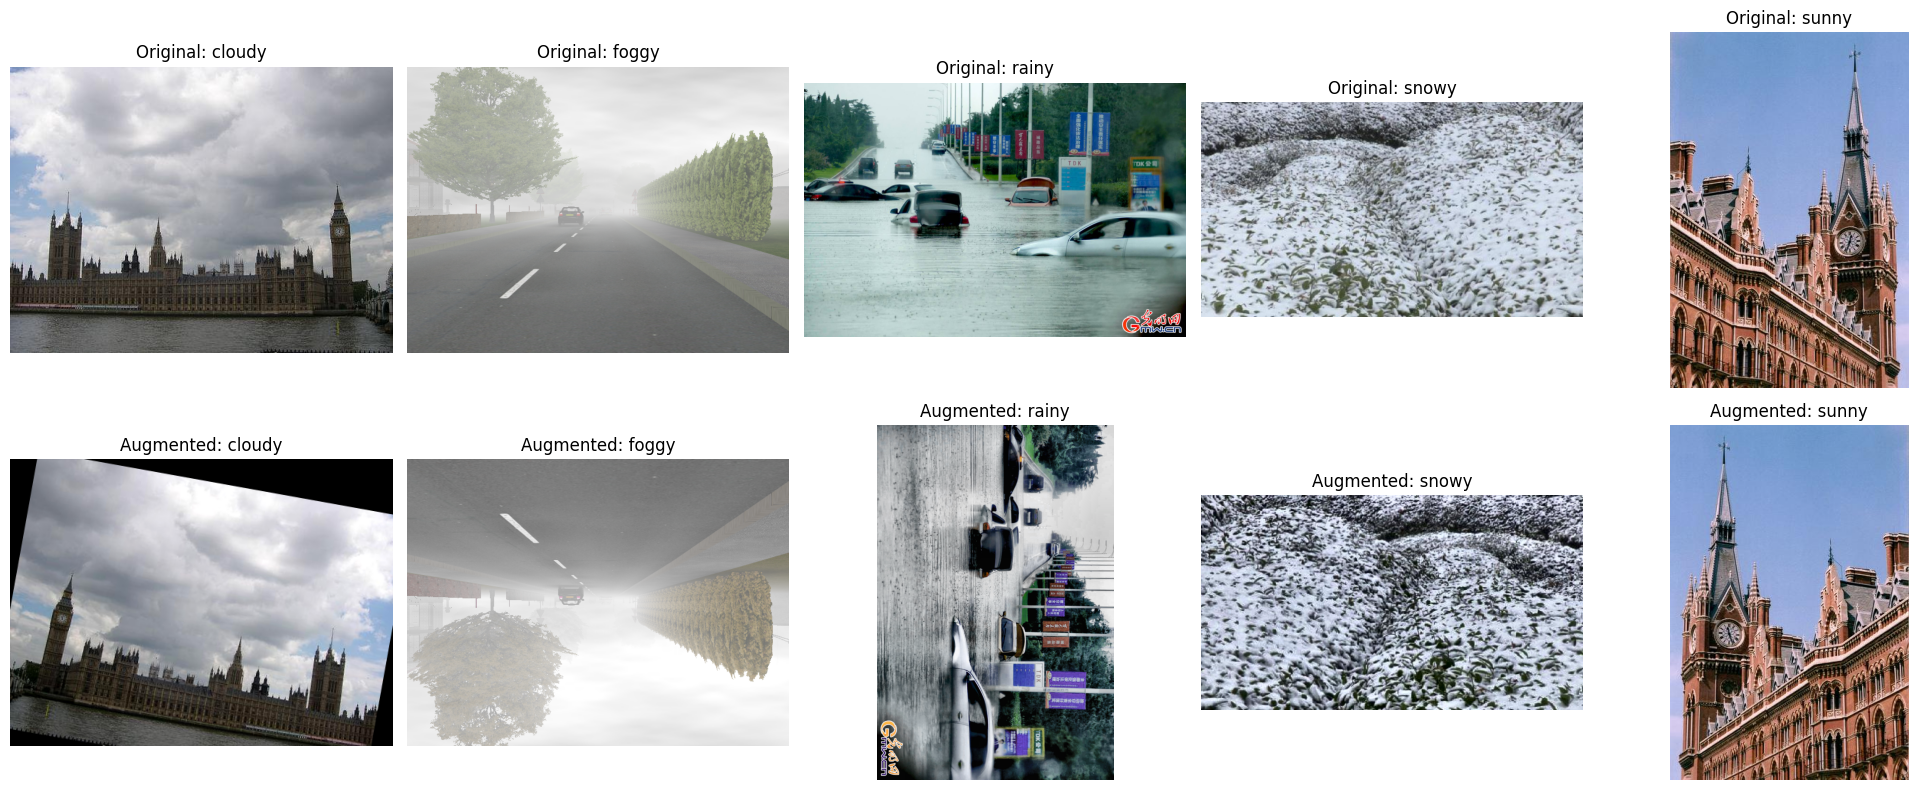

In [6]:
#Visualize some samples with augmentation
def visualize_samples():
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))

    for i, class_name in enumerate(config.CLASSES):
        class_path = os.path.join(config.DATA_PATH, class_name)
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        if images:
            #Original image
            img_path = os.path.join(class_path, images[0])
            original_img = cv2.imread(img_path)
            original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

            #Augmented image
            augmented_img = augmentation(image=original_img)['image']

            axes[0, i].imshow(original_img)
            axes[0, i].set_title(f'Original: {class_name}')
            axes[0, i].axis('off')

            axes[1, i].imshow(augmented_img)
            axes[1, i].set_title(f'Augmented: {class_name}')
            axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

visualize_samples()

In [7]:
#Initialize YOLO model
def setup_model():
    model = YOLO(config.PRETRAINED_MODEL)
    return model

model = setup_model()
print("Model loaded successfully!")

Model loaded successfully!


In [ ]:
#Train the model
def train_model():
    results = model.train(
        data=os.path.join(config.OUTPUT_PATH, "dataset.yaml"),
        epochs=config.EPOCHS,
        imgsz=config.IMG_SIZE,
        batch=config.BATCH_SIZE,
        patience=2,
        save=True,
        device=0 if torch.cuda.is_available() else 'cpu',
        workers=20,
        degrees=0.0,  #Image rotation
        translate=0.1,  #Image translation
        scale=0.5,     #Image scale
        shear=0.0,     #Image shear
        perspective=0.0,  #Image perspective
        flipud=0.0,    #Image flip up-down
        fliplr=0.5,    #Image flip left-right
        mosaic=1.0,    #Image mosaic
        mixup=0.0,     #Image mixup
        copy_paste=0.0,  #Segment copy-paste
    )
    return results

training_results = train_model()

New https://pypi.org/project/ultralytics/8.3.223 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.220  Python-3.13.9 torch-2.9.0+cpu CPU (12th Gen Intel Core i7-12700H)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=weather-training-and-classification-project\dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=128, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4,

In [8]:
#Evaluate the model
def evaluate_model():
    #Load the best model from training
    best_model_path = config.BEST_PATTH
    model = YOLO(best_model_path)

    #Validate on validation set
    metrics = model.val(
        data=os.path.join(config.OUTPUT_PATH, "dataset.yaml"),
        split='val',
        imgsz=config.IMG_SIZE,
        batch=config.BATCH_SIZE,
        conf=0.25,
        iou=0.45
    )

    return metrics, model

metrics, best_model = evaluate_model()
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP50-95: {metrics.box.map:.4f}")

Ultralytics 8.3.220  Python-3.13.9 torch-2.9.0+cpu CPU (12th Gen Intel Core i7-12700H)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.40.1 ms, read: 77.956.0 MB/s, size: 69.2 KB)
val: Scanning C:\Users\vixlu\Documents\IAT 360\weather-training-and-classification-project\labels\val.cache... 2049 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2049/2049 3.7Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 33/33 3.3it/s 10.1s
                   all       2049       2049      0.904      0.873       0.94      0.939
                cloudy        433        433      0.827      0.905      0.919      0.919
                 foggy        387        387      0.969      0.882      0.956      0.956
                 rainy        398        398      0.934      0.784       0.92       0.92
                 snowy        400        400      0.929      0.887      0.95

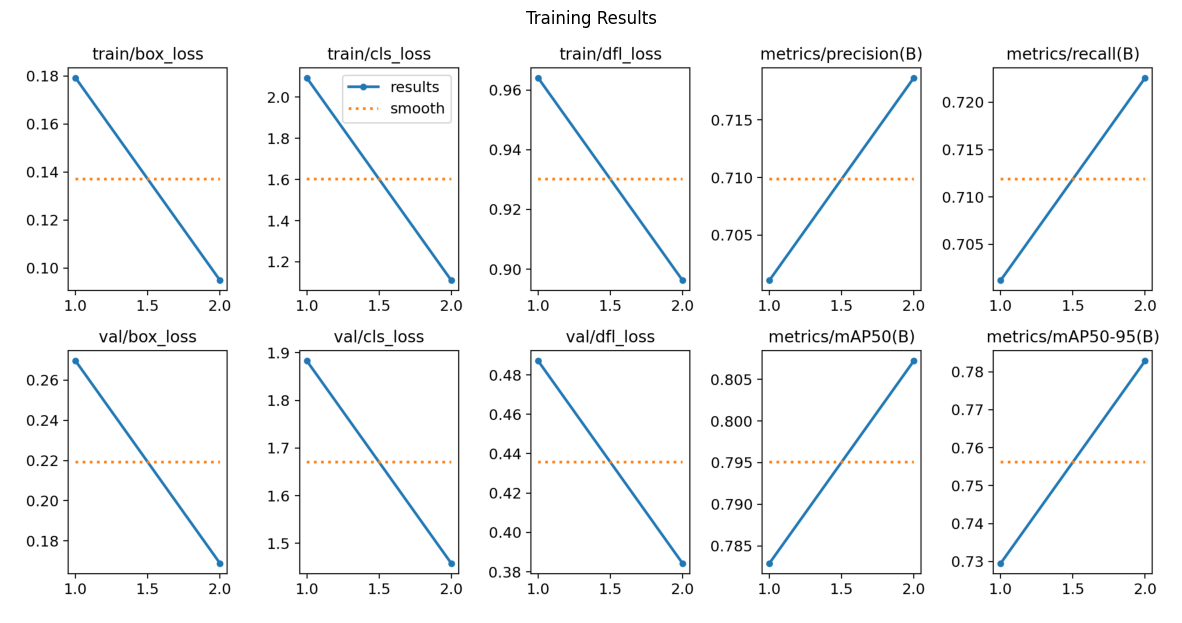

In [9]:
#Plot training results
def plot_training_results():
    results_path = os.path.join(config.RUNS_PATH, "detect", "train4", "results.png")

    if os.path.exists(results_path):
        results_img = cv2.imread(results_path)
        results_img = cv2.cvtColor(results_img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(15, 10))
        plt.imshow(results_img)
        plt.axis('off')
        plt.title('Training Results')
        plt.show()
    else:
        print(f"Results plot not found at {results_path}. Make sure the training was successful.")

plot_training_results()

In [ ]:
#Fine tuning function for further training
def fine_tune_model(additional_epochs=1, learning_rate=0.0001):#change additional epochs to ~20 later if desired
    best_model_path = config.BEST_PATTH
    model = YOLO(best_model_path)

    fine_tune_results = model.train(
        data=os.path.join(config.OUTPUT_PATH, "dataset.yaml"),
        epochs=additional_epochs,
        imgsz=config.IMG_SIZE,
        batch=config.BATCH_SIZE,
        device=0 if torch.cuda.is_available() else 'cpu',
        lr0=learning_rate,
        resume=True,  #Continue from best checkpoint
        patience=5,
        save=True,
        name='fine_tune'  #Save in separate directory
    )

    return fine_tune_results, model

#run fine-tuning
fine_tune_results, fine_tuned_model = fine_tune_model(additional_epochs=20, learning_rate=0.0001)


image 1/1 C:\Users\vixlu\Documents\IAT 360\weather-training-and-classification-project\internet_test_images\test_internet.jpg: 160x224 1 cloudy, 36.1ms
Speed: 0.5ms preprocess, 36.1ms inference, 1.4ms postprocess per image at shape (1, 3, 160, 224)
Predicted: cloudy (confidence: 0.5880)


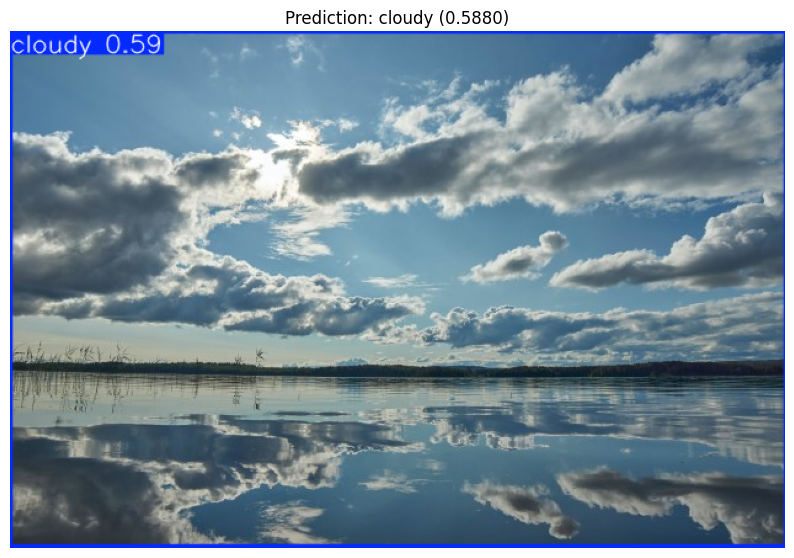


image 1/1 C:\Users\vixlu\Documents\IAT 360\weather-training-and-classification-project\internet_test_images\test_internet_2.jpg: 160x224 1 rainy, 23.9ms
Speed: 0.5ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 160, 224)
Predicted: rainy (confidence: 0.9862)


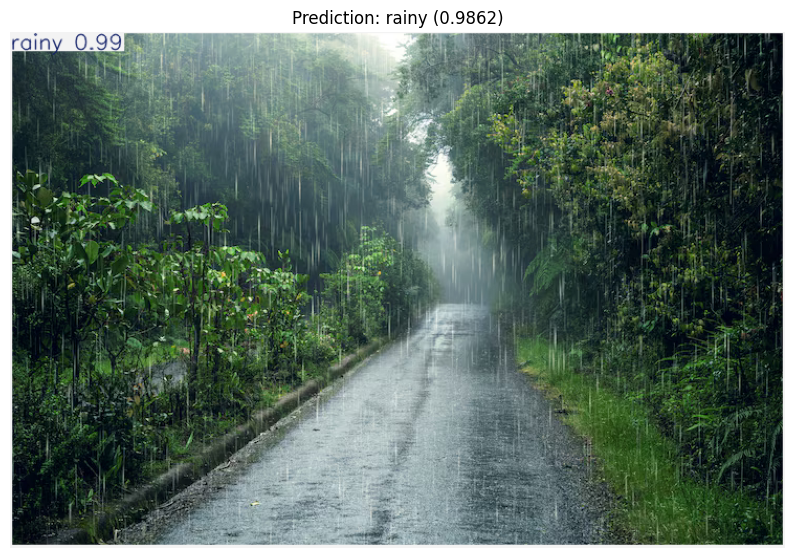


image 1/1 C:\Users\vixlu\Documents\IAT 360\weather-training-and-classification-project\internet_test_images\test_internet_3.jpg: 128x224 1 sunny, 34.5ms
Speed: 0.6ms preprocess, 34.5ms inference, 0.5ms postprocess per image at shape (1, 3, 128, 224)
Predicted: sunny (confidence: 0.9660)


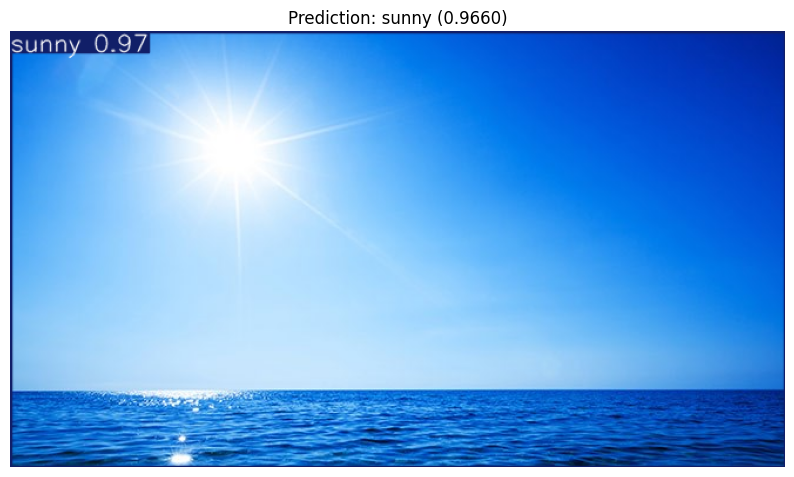

In [10]:
# Function to test on single image
def predict_weather(image_path, model_path=None):
    if model_path is None:
        model_path = config.BEST_PATTH

    model = YOLO(model_path)

    #Perform prediction
    results = model(image_path, conf=0.25)

    #Process results
    for r in results:
        boxes = r.boxes
        if boxes is not None and len(boxes) > 0:
            for box in boxes:
                cls = int(box.cls[0])
                conf = float(box.conf[0])
                class_name = config.CLASSES[cls]
                print(f"Predicted: {class_name} (confidence: {conf:.4f})")

                #Display image with prediction
                img = r.plot()
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.figure(figsize=(10, 8))
                plt.imshow(img_rgb)
                plt.axis('off')
                plt.title(f'Prediction: {class_name} ({conf:.4f})')
                plt.show()
        else:
            print("No predictions found")

    return results

#Test on a sample images taken from internet
sample_image_path = "weather-training-and-classification-project/internet_test_images/test_internet.jpg"
results = predict_weather(sample_image_path)
sample_image_path2 = "weather-training-and-classification-project/internet_test_images/test_internet_2.jpg"
results2 = predict_weather(sample_image_path2)
sample_image_path3 = "weather-training-and-classification-project/internet_test_images/test_internet_3.jpg"
results3 = predict_weather(sample_image_path3)

In [11]:
def test_on_original_dataset(model_path=None, sample_per_class=50):
    """Test the model on the original dataset and generate comprehensive metrics"""
    if model_path is None:
        model_path = config.BEST_PATTH

    model = YOLO(model_path)

    all_predictions = []
    all_true_labels = []
    all_confidences = []
    all_image_paths = []

    print("Testing on original dataset...")

    for class_idx, class_name in enumerate(config.CLASSES):
        class_path = os.path.join(config.DATA_PATH, class_name)
        if not os.path.exists(class_path):
            print(f"Warning: {class_path} not found")
            continue

        #Get all images for this class
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        #Sample images if specified
        if sample_per_class and len(images) > sample_per_class:
            images = random.sample(images, sample_per_class)

        print(f"Testing {class_name}: {len(images)} images")

        for img_name in images:
            img_path = os.path.join(class_path, img_name)

            #Perform prediction
            results = model(img_path, verbose=False)

            pred_class = -1  #Default for no prediction
            confidence = 0.0

            for r in results:
                boxes = r.boxes
                if boxes is not None and len(boxes) > 0:
                    #Take the highest confidence prediction
                    max_conf_idx = torch.argmax(boxes.conf).item()
                    pred_class = int(boxes.cls[max_conf_idx])
                    confidence = float(boxes.conf[max_conf_idx])

            all_predictions.append(pred_class)
            all_true_labels.append(class_idx)
            all_confidences.append(confidence)
            all_image_paths.append(img_path)

    return all_true_labels, all_predictions, all_confidences, all_image_paths


In [12]:
#this is to evaluate the results of the tests
def evaluate_predictions(true_labels, predictions, confidences, image_paths):
    """Generate comprehensive evaluation metrics"""
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    from sklearn.metrics import precision_recall_fscore_support

    print("\n" + "="*60)
    print("COMPREHENSIVE MODEL EVALUATION")
    print("="*60)

    #Filter out images with no predictions
    valid_indices = [i for i, pred in enumerate(predictions) if pred != -1]

    if not valid_indices:
        print("No valid predictions found!")
        return

    filtered_true = [true_labels[i] for i in valid_indices]
    filtered_pred = [predictions[i] for i in valid_indices]
    filtered_conf = [confidences[i] for i in valid_indices]

    #Basic metrics
    accuracy = accuracy_score(filtered_true, filtered_pred)
    precision, recall, f1, support = precision_recall_fscore_support(
        filtered_true, filtered_pred, average='weighted'
    )

    print(f"\nOverall Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Images with predictions: {len(valid_indices)}/{len(true_labels)}")
    print(f"Prediction rate: {len(valid_indices)/len(true_labels)*100:.2f}%")

    #Per-class metrics
    print(f"\nPer-class Metrics:")
    print(classification_report(filtered_true, filtered_pred,
                              target_names=config.CLASSES, digits=4))

    #Confusion Matrix
    cm = confusion_matrix(filtered_true, filtered_pred)
    #plot_confusion_matrix(cm, config.CLASSES)

    #Confidence Analysis
    analyze_confidence(filtered_conf, filtered_true, filtered_pred, config.CLASSES)

    #Error Analysis
    analyze_errors(filtered_true, filtered_pred, filtered_conf, image_paths, valid_indices)

    return accuracy, precision, recall, f1

In [13]:
def plot_confusion_matrix(cm, class_names):
    """Plot detailed confusion matrix"""
    plt.figure(figsize=(12, 10))

    #Calculate percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    #Create heatmap
    sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Percentage (%)'})

    plt.title('Confusion Matrix (Percentage per True Class)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    #Also show absolute numbers
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Count'})
    plt.title('Confusion Matrix (Absolute Counts)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def analyze_confidence(confidences, true_labels, predictions, class_names):
    """Analyze prediction confidence"""
    plt.figure(figsize=(15, 5))

    #Confidence distribution
    plt.subplot(1, 3, 1)
    plt.hist(confidences, bins=20, alpha=0.7, edgecolor='black')
    plt.xlabel('Confidence')
    plt.ylabel('Frequency')
    plt.title('Confidence Distribution')
    plt.grid(True, alpha=0.3)

    #Confidence by class
    plt.subplot(1, 3, 2)
    confidence_by_class = []
    class_names_list = []

    for i, class_name in enumerate(class_names):
        class_confidences = [conf for j, conf in enumerate(confidences) if true_labels[j] == i]
        if class_confidences:
            confidence_by_class.append(np.mean(class_confidences))
            class_names_list.append(class_name)

    plt.bar(class_names_list, confidence_by_class, alpha=0.7)
    plt.xticks(rotation=45)
    plt.ylabel('Average Confidence')
    plt.title('Average Confidence by True Class')

    #Accuracy vs Confidence
    plt.subplot(1, 3, 3)
    correct = [1 if true_labels[i] == predictions[i] else 0 for i in range(len(true_labels))]
    confidence_bins = np.linspace(0, 1, 11)
    accuracy_by_confidence = []

    for i in range(len(confidence_bins)-1):
        bin_mask = (np.array(confidences) >= confidence_bins[i]) & (np.array(confidences) < confidence_bins[i+1])
        if sum(bin_mask) > 0:
            accuracy = np.mean(np.array(correct)[bin_mask])
            accuracy_by_confidence.append(accuracy)
        else:
            accuracy_by_confidence.append(0)

    plt.plot(confidence_bins[:-1], accuracy_by_confidence, 'o-', linewidth=2)
    plt.xlabel('Confidence Bin')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Confidence')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [14]:
def analyze_errors(true_labels, predictions, confidences, image_paths, valid_indices):
    """Analyze misclassified images"""
    misclassified = []

    for i, idx in enumerate(valid_indices):
        if true_labels[i] != predictions[i]:
            misclassified.append({
                'image_path': image_paths[idx],
                'true_class': config.CLASSES[true_labels[i]],
                'predicted_class': config.CLASSES[predictions[i]],
                'confidence': confidences[i],
                'true_idx': true_labels[i],
                'pred_idx': predictions[i]
            })

    if misclassified:
        print(f"\nError Analysis ({len(misclassified)} misclassified images):")

        #Most common error types
        error_types = {}
        for error in misclassified:
            error_key = f"{error['true_class']} -> {error['predicted_class']}"
            error_types[error_key] = error_types.get(error_key, 0) + 1

        print("\nMost common error types:")
        for error_type, count in sorted(error_types.items(), key=lambda x: x[1], reverse=True)[:10]:
            print(f"  {error_type}: {count} occurrences")

        #Show some misclassified examples
        print(f"\nShowing {min(5, len(misclassified))} misclassified examples:")
        show_misclassified_examples(misclassified[:5])

        return misclassified
    else:
        print("\nNo misclassified images found!")
        return []

def show_misclassified_examples(misclassified):
    """Display misclassified images"""
    fig, axes = plt.subplots(1, len(misclassified), figsize=(20, 4))
    if len(misclassified) == 1:
        axes = [axes]

    for i, error in enumerate(misclassified):
        if i >= len(axes):
            break

        img = cv2.imread(error['image_path'])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].set_title(f"True: {error['true_class']}\nPred: {error['predicted_class']}\nConf: {error['confidence']:.3f}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

In [15]:
def run_comprehensive_test(sample_per_class=100):
    """Run comprehensive testing on the original dataset"""
    print("Starting comprehensive model evaluation...")

    #Test on original dataset
    true_labels, predictions, confidences, image_paths = test_on_original_dataset(
        sample_per_class=sample_per_class
    )

    #Generate comprehensive metrics
    metrics = evaluate_predictions(true_labels, predictions, confidences, image_paths)

    #Test on individual samples
    print("\n" + "="*60)
    print("INDIVIDUAL SAMPLE TESTING")
    print("="*60)
    test_individual_samples()

    return metrics

def test_individual_samples():
    """Test on individual samples from each class"""
    model_path = config.BEST_PATTH
    model = YOLO(model_path)

    for class_name in config.CLASSES:
        class_path = os.path.join(config.DATA_PATH, class_name)
        if os.path.exists(class_path):
            images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            if images:
                #Test on one random image from each class
                test_image = random.choice(images)
                test_image_path = os.path.join(class_path, test_image)

                print(f"\nTesting {class_name}: {test_image}")
                predict_weather(test_image_path, model_path)

In [29]:
#Update the original function to be more detailed
def predict_weather(image_path, model_path=None, show_image=True):
    """Enhanced prediction function with detailed output"""
    if model_path is None:
        model_path = config.BEST_PATTH

    model = YOLO(model_path)

    #Perform prediction
    try:
        results = model(image_path, conf=0.25, verbose=False) # Add verbose=False to suppress output during testing
    except Exception as e:
        print(f"WARNING Image Read Error {image_path}")
        print(f"Error processing image {image_path}: {e}")
        return [] # Return empty list for predictions if image cannot be processed

    #Process results
    predictions = []
    for r in results:
        boxes = r.boxes
        if boxes is not None and len(boxes) > 0:
            for i, box in enumerate(boxes):
                cls = int(box.cls[i])
                conf = float(box.conf[i])
                class_name = config.CLASSES[cls]
                predictions.append((class_name, conf))

                print(f"Prediction {i+1}: {class_name} (confidence: {conf:.4f})")

        if show_image:
            #Display image with prediction
            img = r.plot()
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(10, 8))
            plt.imshow(img_rgb)
            plt.axis('off')
            if predictions:
                title = f"Predictions: {', '.join([f'{p[0]} ({p[1]:.3f})' for p in predictions])}"
            else:
                title = "No predictions found"
            plt.title(title)
            plt.show()

    return predictions

Starting comprehensive model evaluation...
Testing on original dataset...
Testing cloudy: 50 images
Testing foggy: 50 images
Testing rainy: 50 images
Testing snowy: 50 images
Testing sunny: 50 images

COMPREHENSIVE MODEL EVALUATION

Overall Metrics:
Accuracy: 0.9240
Precision: 0.9246
Recall: 0.9240
F1-Score: 0.9237
Images with predictions: 250/250
Prediction rate: 100.00%

Per-class Metrics:
              precision    recall  f1-score   support

      cloudy     0.8936    0.8400    0.8660        50
       foggy     0.9787    0.9200    0.9485        50
       rainy     0.9245    0.9800    0.9515        50
       snowy     0.9608    0.9800    0.9703        50
       sunny     0.8654    0.9000    0.8824        50

    accuracy                         0.9240       250
   macro avg     0.9246    0.9240    0.9237       250
weighted avg     0.9246    0.9240    0.9237       250



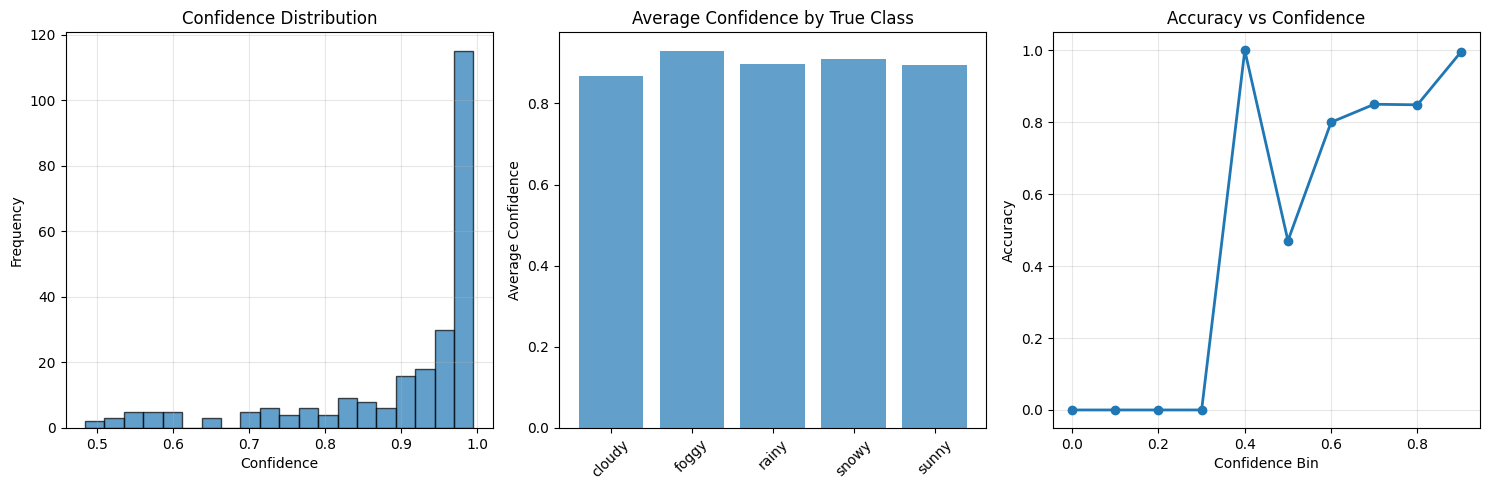


Error Analysis (19 misclassified images):

Most common error types:
  cloudy -> sunny: 6 occurrences
  sunny -> cloudy: 4 occurrences
  cloudy -> rainy: 2 occurrences
  foggy -> rainy: 2 occurrences
  foggy -> snowy: 1 occurrences
  foggy -> sunny: 1 occurrences
  rainy -> cloudy: 1 occurrences
  snowy -> foggy: 1 occurrences
  sunny -> snowy: 1 occurrences

Showing 5 misclassified examples:


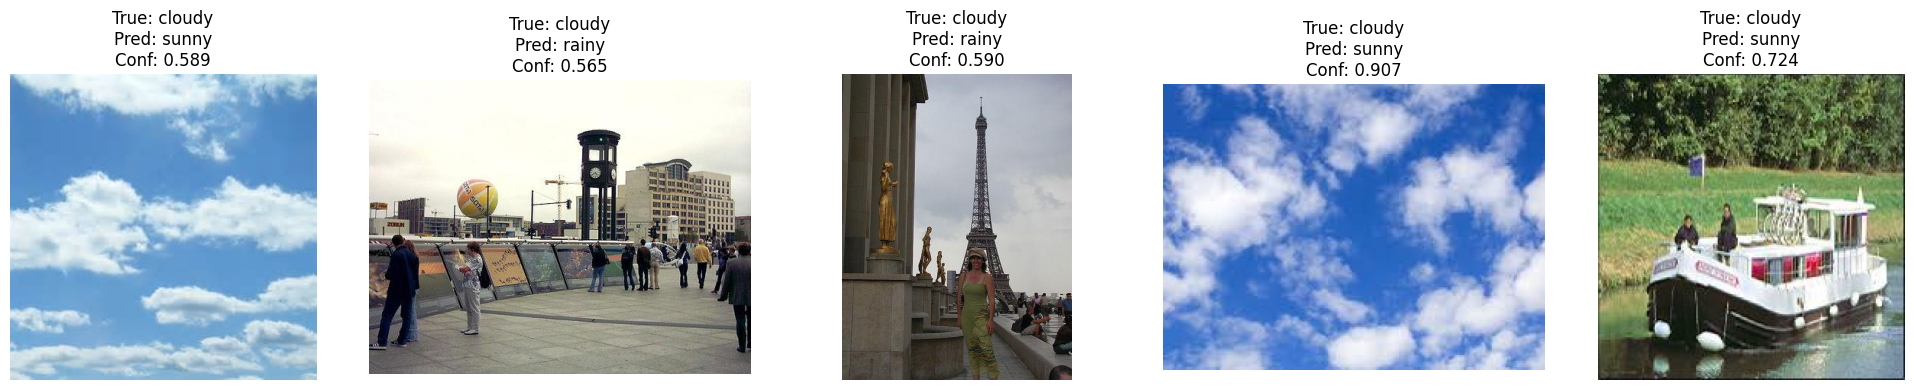


INDIVIDUAL SAMPLE TESTING

Testing cloudy: c1280.jpg
Prediction 1: cloudy (confidence: 0.9630)


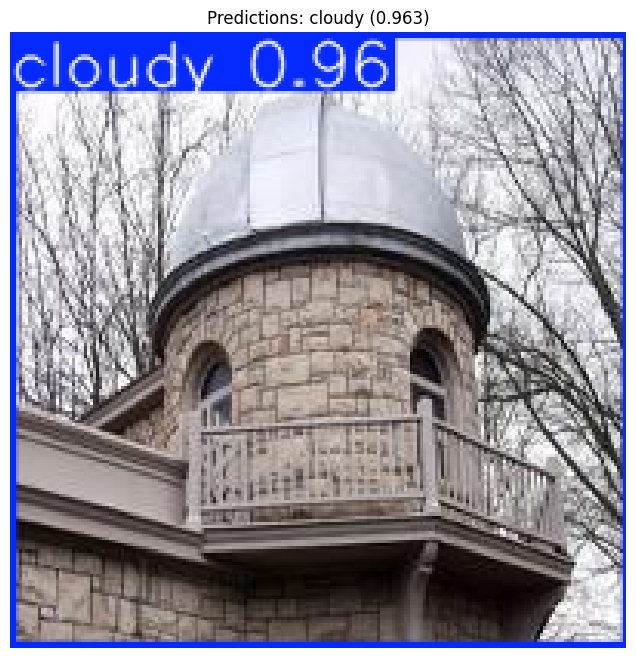


Testing foggy: 4548.jpg
Prediction 1: foggy (confidence: 0.9911)


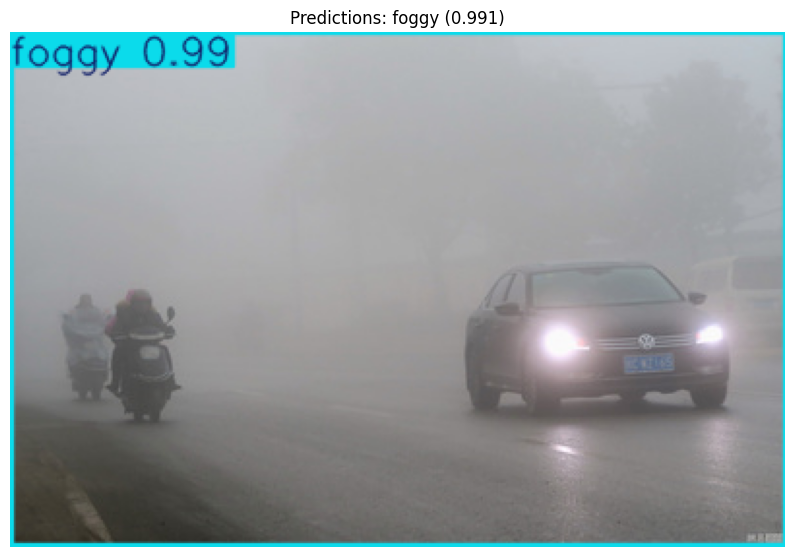


Testing rainy: 1600.jpg
Prediction 1: rainy (confidence: 0.9611)


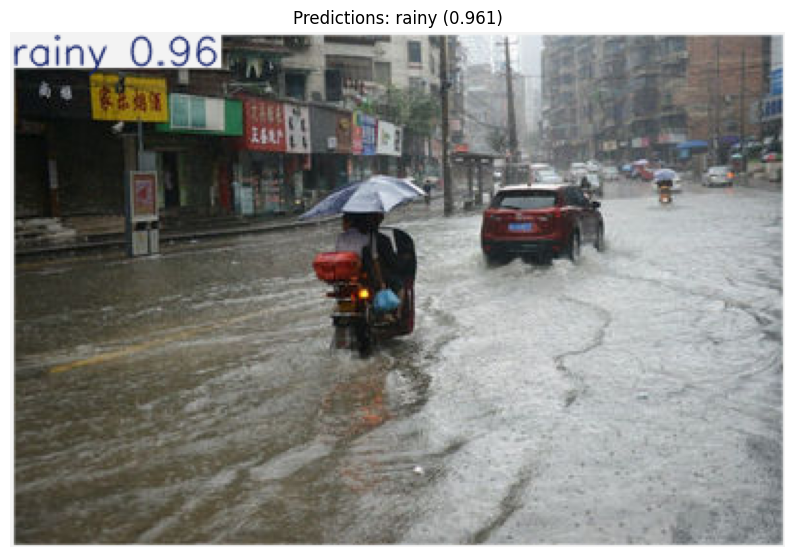


Testing snowy: 287876970.jpg
Prediction 1: snowy (confidence: 0.9380)


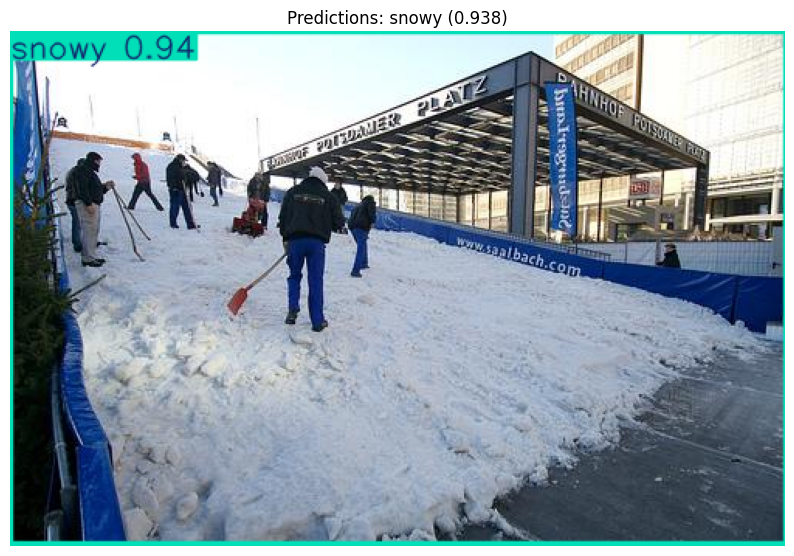


Testing sunny: s4321.jpg
Prediction 1: sunny (confidence: 0.9898)


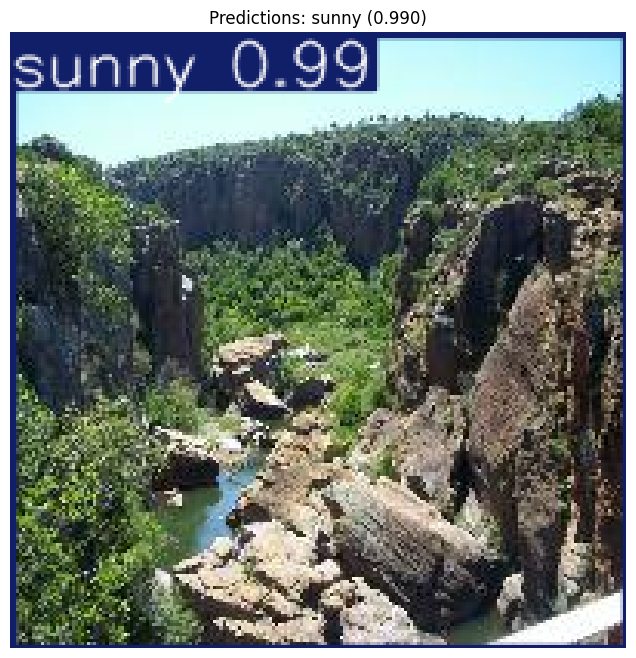

In [30]:
#Run comprehensive testing on the entire dataset
#metrics = run_comprehensive_test(sample_per_class=100)  # Test 100 images per class

#Or test on specific number of images per class
metrics = run_comprehensive_test(sample_per_class=50)

# r test on all images (remove sample_per_class parameter)
# metrics = run_comprehensive_test()

#Test individual image
# results = predict_weather("path_to_your_image.jpg")

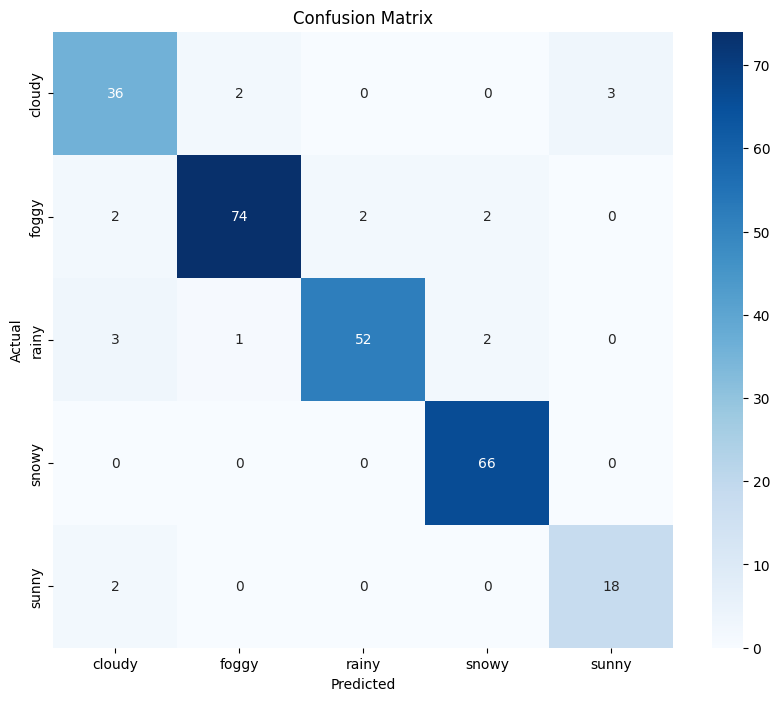


Classification Report:
              precision    recall  f1-score   support

      cloudy       0.84      0.88      0.86        41
       foggy       0.96      0.93      0.94        80
       rainy       0.96      0.90      0.93        58
       snowy       0.94      1.00      0.97        66
       sunny       0.86      0.90      0.88        20

    accuracy                           0.93       265
   macro avg       0.91      0.92      0.92       265
weighted avg       0.93      0.93      0.93       265



In [31]:
#Detailed evaluation with confusion matrix
def detailed_evaluation():
    model_path = config.BEST_PATTH
    model = YOLO(model_path)

    #Get validation directory
    val_dir = os.path.join(config.OUTPUT_PATH, "images", "val")

    all_predictions = []
    all_true_labels = []

    for class_idx, class_name in enumerate(config.CLASSES):
        class_images = [f for f in os.listdir(val_dir)
                       if f.startswith(class_name) or f"aug_" in f]

        for img_name in class_images:
            img_path = os.path.join(val_dir, img_name)
            results = model(img_path, verbose=False)

            for r in results:
                boxes = r.boxes
                if boxes is not None and len(boxes) > 0:
                    pred_class = int(boxes.cls[0])
                    all_predictions.append(pred_class)
                    all_true_labels.append(class_idx)

    #Generate confusion matrix
    cm = confusion_matrix(all_true_labels, all_predictions)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=config.CLASSES, yticklabels=config.CLASSES)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    #Classification report
    print("\nClassification Report:")
    print(classification_report(all_true_labels, all_predictions,
                              target_names=config.CLASSES))

detailed_evaluation()

In [32]:
#Custom Path Testing
def test_on_custom_dataset(custom_path, model_path=None, sample_per_class=None):
    """Test the model on a custom dataset path"""
    if model_path is None:
        model_path = config.BEST_PATTH

    if not os.path.exists(custom_path):
        print(f"Error: Custom path '{custom_path}' does not exist!")
        return None, None, None, None

    model = YOLO(model_path)

    all_predictions = []
    all_true_labels = []
    all_confidences = []
    all_image_paths = []

    print(f"Testing on custom dataset: {custom_path}")

    for class_idx, class_name in enumerate(config.CLASSES):
        class_path = os.path.join(custom_path, class_name)
        if not os.path.exists(class_path):
            print(f"Warning: Class folder '{class_path}' not found, skipping...")
            continue

        # Get all images for this class
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        if not images:
            print(f"Warning: No images found in {class_path}")
            continue

        # Sample images if specified
        if sample_per_class and len(images) > sample_per_class:
            images = random.sample(images, sample_per_class)

        print(f"Testing {class_name}: {len(images)} images")

        for img_name in images:
            img_path = os.path.join(class_path, img_name)

            # Add error handling for image reading
            try:
                # Perform prediction
                results = model(img_path, verbose=False)
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")
                continue # Skip this image

            pred_class = -1  # Default for no prediction
            confidence = 0.0

            for r in results:
                boxes = r.boxes
                if boxes is not None and len(boxes) > 0:
                    # Take the highest confidence prediction
                    max_conf_idx = torch.argmax(boxes.conf).item()
                    pred_class = int(boxes.cls[max_conf_idx])
                    confidence = float(boxes.conf[max_conf_idx])

            all_predictions.append(pred_class)
            all_true_labels.append(class_idx)
            all_confidences.append(confidence)
            all_image_paths.append(img_path)

    print(f"\nTotal images processed: {len(all_true_labels)}")
    return all_true_labels, all_predictions, all_confidences, all_image_paths

def run_comprehensive_test_custom(custom_path, sample_per_class=None, model_path=None):
    """Run comprehensive testing on a custom dataset path"""
    print(f"Starting comprehensive model evaluation on: {custom_path}")

    #Test on custom dataset
    true_labels, predictions, confidences, image_paths = test_on_custom_dataset(
        custom_path=custom_path,
        model_path=model_path,
        sample_per_class=sample_per_class
    )

    if true_labels is None or not true_labels:
        print("No valid images were processed for evaluation.")
        return None


    #Generate comprehensive metrics using existing function
    metrics = evaluate_predictions(true_labels, predictions, confidences, image_paths)

    #Test on individual samples
    print("\n" + "="*60)
    print("INDIVIDUAL SAMPLE TESTING FROM CUSTOM DATASET")
    print("="*60)
    test_individual_samples_custom(custom_path, model_path)

    return metrics

def test_individual_samples_custom(custom_path, model_path=None):
    """Test on individual samples from each class in custom path"""
    if model_path is None:
        model_path = config.BEST_PATTH

    model = YOLO(model_path)

    for class_name in config.CLASSES:
        class_path = os.path.join(custom_path, class_name)
        if os.path.exists(class_path):
            images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            if images:
                #Test on one random image from each class
                test_image = random.choice(images)
                test_image_path = os.path.join(class_path, test_image)

                print(f"\nTesting {class_name}: {test_image}")
                predictions = predict_weather(test_image_path, model_path, show_image=True)

                if predictions:
                    best_pred = max(predictions, key=lambda x: x[1])
                    print(f"Best prediction: {best_pred[0]} (confidence: {best_pred[1]:.4f})")
                print("-" * 50)

def quick_test_custom(custom_path, sample_per_class=20, model_path=None):
    """Quick test on custom path with minimal output"""
    print(f"Quick testing on: {custom_path}")
    true_labels, predictions, confidences, image_paths = test_on_custom_dataset(
        custom_path=custom_path,
        model_path=model_path,
        sample_per_class=sample_per_class
    )

    if true_labels is not None and true_labels:
        #Calculate basic accuracy
        valid_indices = [i for i, pred in enumerate(predictions) if pred != -1]
        if valid_indices:
            filtered_true = [true_labels[i] for i in valid_indices]
            filtered_pred = [predictions[i] for i in valid_indices]
            accuracy = accuracy_score(filtered_true, filtered_pred)
            print(f"Quick Test Accuracy: {accuracy:.4f}")
            print(f"Images with predictions: {len(valid_indices)}/{len(true_labels)}")
        return accuracy if valid_indices else 0.0
    else:
         print("No valid images were processed for quick test.")
         return 0.0


def batch_test_custom_paths(paths_list, sample_per_class=50, model_path=None):
    """Test on multiple custom paths"""
    results = {}

    for custom_path in paths_list:
        if not os.path.exists(custom_path):
            print(f"Warning: Path '{custom_path}' does not exist, skipping...")
            results[custom_path] = "Path not found"
            continue

        print(f"\n{'='*60}")
        print(f"TESTING: {custom_path}")
        print(f"{'='*60}")

        true_labels, predictions, confidences, image_paths = test_on_custom_dataset(
            custom_path=custom_path,
            model_path=model_path,
            sample_per_class=sample_per_class
        )

        if true_labels is not None and true_labels:
            #Calculate basic accuracy
            valid_indices = [i for i, pred in enumerate(predictions) if pred != -1]
            if valid_indices:
                filtered_true = [true_labels[i] for i in valid_indices]
                filtered_pred = [predictions[i] for i in valid_indices]
                accuracy = accuracy_score(filtered_true, filtered_pred)
                results[custom_path] = accuracy
                print(f"Accuracy: {accuracy:.4f}")
            else:
                results[custom_path] = 0.0
                print(f"Accuracy: 0.0 (no valid predictions)")
        else:
            results[custom_path] = 0.0
            print(f"Accuracy: 0.0 (no valid images processed)")


    #Print summary
    print(f"\n{'='*60}")
    print("BATCH TESTING SUMMARY")
    print(f"{'='*60}")
    for path, accuracy in results.items():
        if isinstance(accuracy, float):
            print(f"{path}: {accuracy:.4f}")
        else:
            print(f"{path}: {accuracy}")

    return results

Starting comprehensive model evaluation on: weather-training-and-classification-project/collected_data
Testing on custom dataset: weather-training-and-classification-project/collected_data
Testing cloudy: 12 images
Testing foggy: 12 images
Testing rainy: 12 images
WARNING Image Read Error C:\Users\vixlu\Documents\IAT 360\weather-training-and-classification-project\collected_data\rainy\r10.jpg
Error processing image weather-training-and-classification-project/collected_data\rainy\r10.jpg: need at least one array to stack
WARNING Image Read Error C:\Users\vixlu\Documents\IAT 360\weather-training-and-classification-project\collected_data\rainy\r11.jpg
Error processing image weather-training-and-classification-project/collected_data\rainy\r11.jpg: need at least one array to stack
WARNING Image Read Error C:\Users\vixlu\Documents\IAT 360\weather-training-and-classification-project\collected_data\rainy\r12.jpg
Error processing image weather-training-and-classification-project/collected_data\

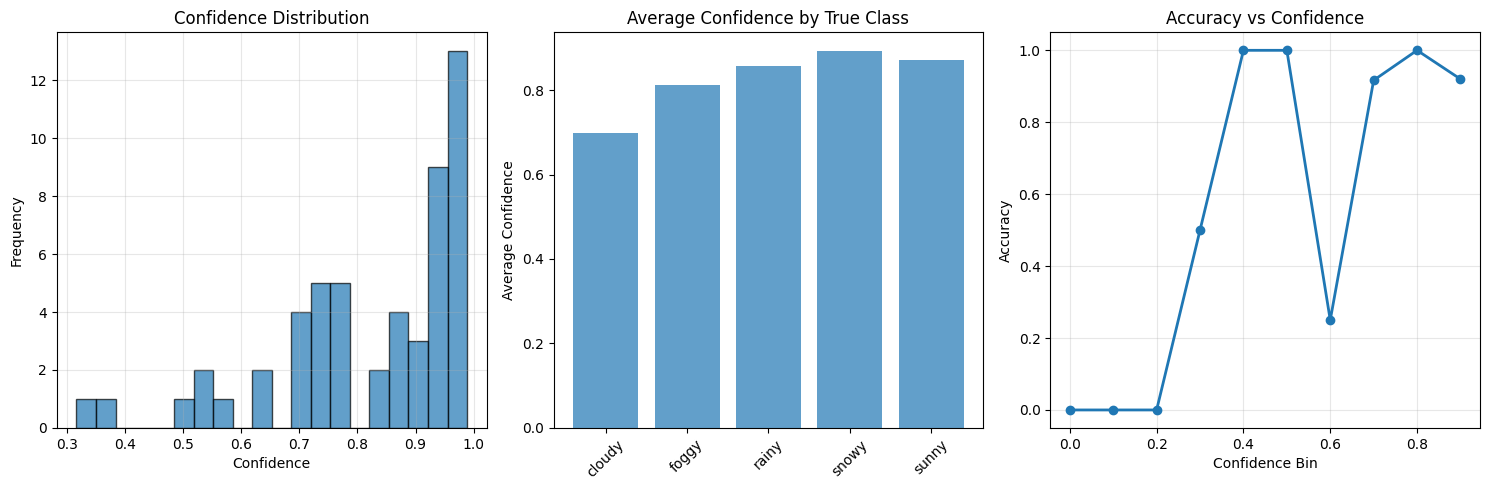


Error Analysis (7 misclassified images):

Most common error types:
  cloudy -> sunny: 1 occurrences
  foggy -> snowy: 1 occurrences
  foggy -> rainy: 1 occurrences
  foggy -> sunny: 1 occurrences
  rainy -> cloudy: 1 occurrences
  rainy -> foggy: 1 occurrences
  sunny -> rainy: 1 occurrences

Showing 5 misclassified examples:


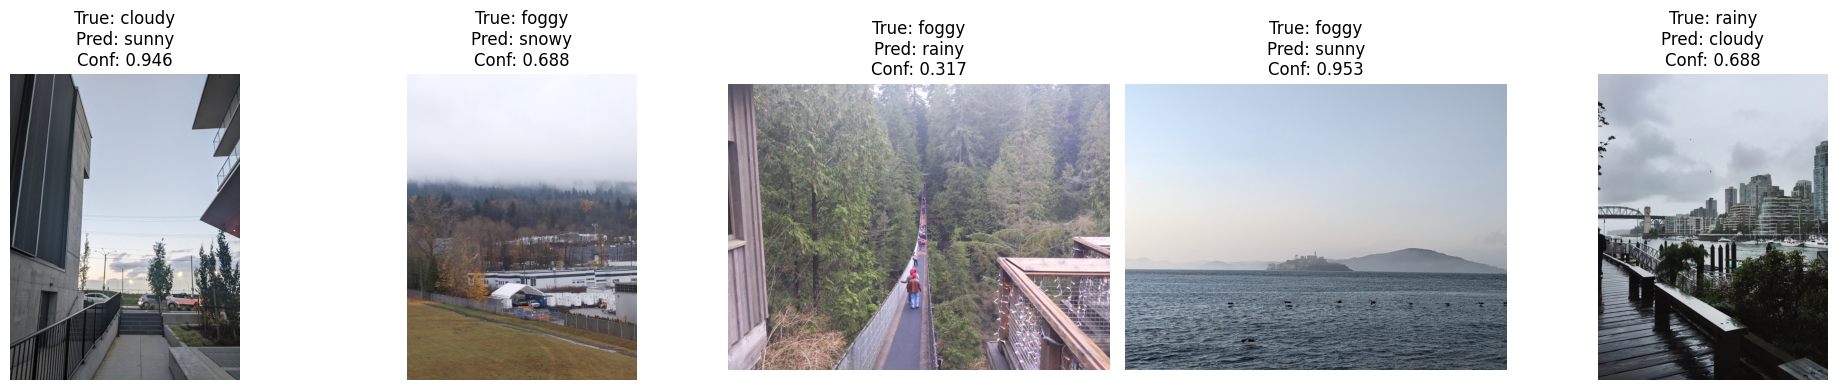


INDIVIDUAL SAMPLE TESTING FROM CUSTOM DATASET

Testing cloudy: c11.jpg
Prediction 1: cloudy (confidence: 0.5308)


IndexError: index 1 is out of bounds for dimension 0 with size 1

In [34]:
#run custom path tests
custom_path = "weather-training-and-classification-project/collected_data"
model_path = config.BEST_PATTH
metrics = run_comprehensive_test_custom(custom_path, sample_per_class=12)